<a href="https://colab.research.google.com/github/CodeHunterOfficial/NLP/blob/main/Lecture5_1_An_Introduction_to_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Пишем нейросеть на Python с нуля

Термин "нейронные сети" сейчас можно услышать из каждого утюга, и многие верят, будто это что-то очень сложное. На самом деле нейронные сети совсем не такие сложные, как может показаться! Мы разберемся, как они работают, реализовав одну сеть с нуля на Python.

##1. Составные элементы: нейроны
Прежде всего нам придется обсудить нейроны, базовые элементы нейронной сети. Нейрон принимает несколько входов, выполняет над ними кое-какие математические операции, а потом выдает один выход. Вот как выглядит нейрон с двумя входами:

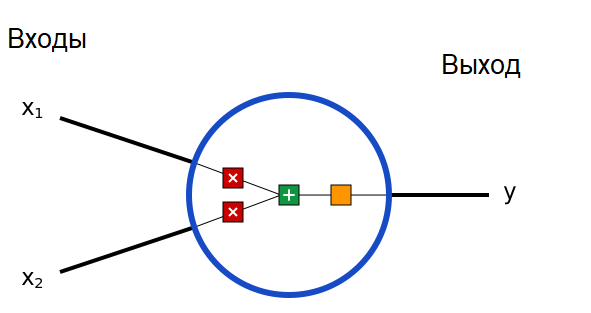

Внутри нейрона происходят три операции. Сначала значения входов умножаются на веса:
$$
\begin{equation*}
 \begin{cases}
   x_1=x_1 *\omega_1 \\
   x_2=x_2* \omega_2
 \end{cases}
\end{equation*}
$$

Затем взвешенные входы складываются, и к ним прибавляется значение порога b:
$$x_1*\omega_1+x_2 * \omega_2+b$$

Наконец, полученная сумма проходит через функцию активации:

$$y=f(x_1*\omega_1+x_2 * \omega_2+b)$$

Функция активации преобразует неограниченные значения входов в выход, имеющий ясную и предсказуемую форму. Одна из часто используемых функций активации – [сигмоида](https://ru.wikipedia.org/wiki/Сигмоида):

$$
f(x)=\frac{1}{1+e^{-x}}
$$

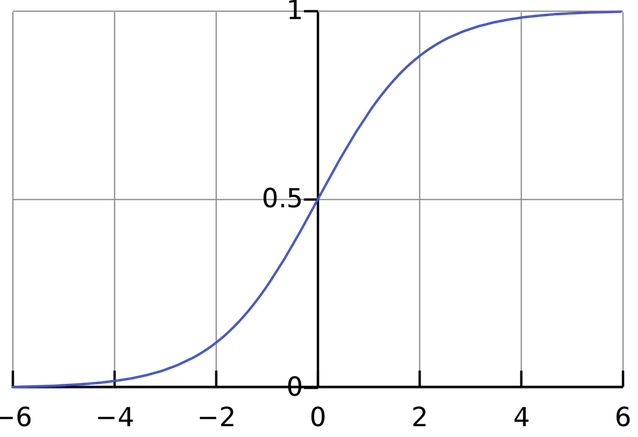

Сигмоида выдает результаты в интервале (0, 1). Можно представить, что она «упаковывает» интервал от минус бесконечности до плюс бесконечности в (0, 1): большие отрицательные числа превращаются в числа, близкие к 0, а большие положительные – к 1.

###Простой пример
Допустим, наш двухвходовой нейрон использует сигмоидную функцию активации и имеет следующие параметры:

$$\omega=[0,1], b=4$$



w=[0, 1] – это всего лишь запись w1=0, w2=1 в векторном виде. Теперь зададим нашему нейрону входные данные: x=[2, 3]. Мы используем [скалярное произведение векторов](https://ru.wikipedia.org/wiki/Скалярное_произведение), чтобы записать формулу в сжатом виде:
$$
(\omega ⋅ x)+b=((\omega_1 \cdot x_1)+(\omega_2 \cdot x_2))+b=0 \cdot 2+1\cdot 3+4=7
$$

$$
y=f((\omega ⋅ x)+b)=f(7)=\frac{1}{1+e^{-7}}=0.999
$$

Наш нейрон выдал 0.999 при входах x=[2, 3]. Вот и все! Процесс передачи значений входов дальше, чтобы получить выход, называется [прямой связью (feed forward)](https://ru.wikipedia.org/wiki/Нейронная_сеть_с_прямой_связью).
>Нейронная сеть с прямой связью — искусственная нейронная сеть, в которой соединения между узлами не образуют цикл. Такая сеть отличается от рекуррентной нейронной сети.

###Пишем код для нейрона
Настало время написать свой нейрон! Мы используем NumPy, популярную и мощную расчетную библиотеку для Python, которая поможет нам с вычислениями:

In [1]:
import numpy as np

def sigmoid(x):
  # Наша функция активации: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Умножаем входы на веса, прибавляем порог, затем используем функцию активации
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

In [2]:
weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


**Узнаете эти числа?** Это тот самый пример, который мы только что рассчитали! И мы получили тот же результат – 0.999.

##2. Собираем нейронную сеть из нейронов
Нейронная сеть – это всего лишь несколько нейронов, соединенных вместе. Вот как может выглядеть простая нейронная сеть:



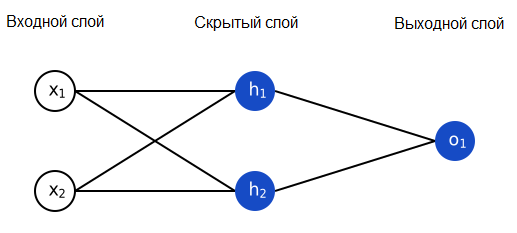

У этой сети два входа, скрытый слой с двумя нейронами ($h_1$ и $h_2$) и выходной слой с одним нейроном ($o_1$). Обратите внимание, что входы для $o_1$ – это выходы из h1 и h2. Именно это создает из нейронов сеть.

**Замечание**
>Скрытый слой – это любой слой между входным (первым) слоем сети и выходным (последним). Скрытых слоев может быть много!

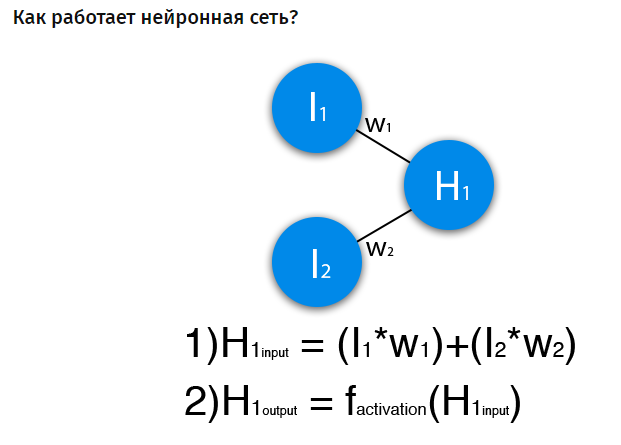

**Пример: прямая связь**

Давайте используем сеть, изображенную выше, и будем считать, что все нейроны имеют одинаковые веса $w=[0, 1]$, одинаковые пороговые значения b=0, и одинаковую функцию активации – сигмоиду. Пусть $h_1, h_2$ и $o_1$ обозначают выходные значения соответствующих нейронов.

**Что получится, если мы подадим на вход x=[2, 3]?**
$$
h_1=h_2=f(\omega \cdot x+b)=f((0 \cdot 2)+ (1 \cdot 3)+0)=f(3)=0.9526
$$
$$
o_1=f(\omega \cdot[h_1, h_2]+b)=f((0 \cdot h_1)+(1 \cdot h_2)+0)=f(0,9526)=0.7216
$$

Если подать на вход нашей нейронной сети x=[2, 3], на выходе получится 0.7216. **Достаточно просто, не правда ли?**

Нейронная сеть может иметь любое количество слоев, и в этих слоях может быть любое количество нейронов. Основная идея остается той же: передавайте входные данные по нейронам сети, пока не получите выходные значения. Для простоты мы будем использовать сеть, показанную выше, до конца статьи.

###Пишем код нейронной сети

Давайте реализуем прямую связь для нашей нейронной сети. Напомним, как она выглядит:

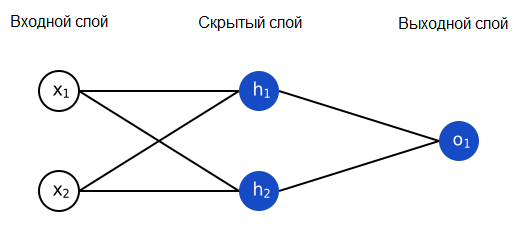

In [3]:
import numpy as np

# ... вставьте сюда код из предыдущего раздела

class OurNeuralNetwork:
  '''
  Нейронная сеть с:
    - 2 входами
    - скрытым слоем с 2 нейронами (h1, h2)
    - выходным слоем с 1 нейроном (o1)
  Все нейроны имеют одинаковые веса и пороги:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # Используем класс Neuron из предыдущего раздела
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # Входы для o1 - это выходы h1 и h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


**Мы снова получили 0.7216! Похоже, наша сеть работает.**

##3. Обучаем нейронную сеть (часть 1)
Допустим, у нас есть следующие измерения:

Имя	Вес (в фунтах)	Рост (в дюймах)	Пол
Алиса	133 (54.4 кг)	65 (165,1 см)	Ж
Боб	160 (65,44 кг)	72 (183 см)	М
Чарли	152 (62.2 кг)	70 (178 см)	М
Диана	120 (49 кг)	60 (152 см)	Ж

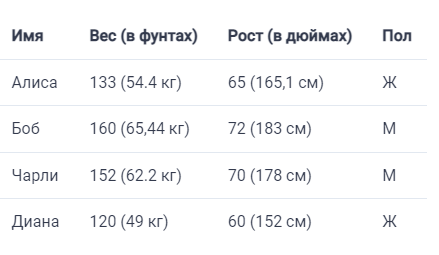

Давайте обучим нашу нейронную сеть предсказывать пол человека по его росту и весу.

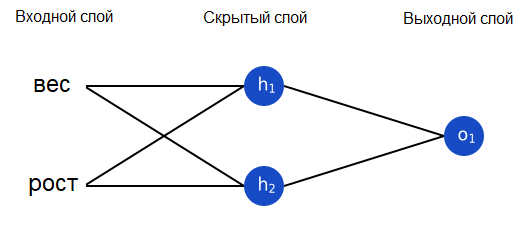

Мы будем представлять мужской пол как 0, женский – как 1, а также сдвинем данные, чтобы их было проще использовать:

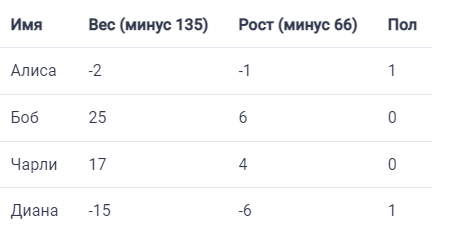

**Замечание**
>Я выбрал величину сдвигов (135 и 66), чтобы числа выглядели попроще. Обычно сдвигают на среднее значение.

###Потери
Прежде чем обучать нашу нейронную сеть, нам нужно как-то измерить, насколько "хорошо" она работает, чтобы она смогла работать "лучше". Это измерение и есть [потери (loss)](https://ru.wikipedia.org/wiki/Функция_потерь)).

Мы используем для расчета потерь среднюю квадратичную ошибку (mean squared error, MSE):

$$
MSE=\frac{1}{n} \sum\limits_{i=1}^n (y_{true}-y_{pred})^2
$$

Давайте рассмотрим все используемые переменные:

* n – это количество измерений, в нашем случае 4 (Алиса, Боб, Чарли и Диана).

* y представляет предсказываемое значение, Пол.

* $y_{true}$ – истинное значение переменной ("правильный ответ"). Например, для Алисы ytrue будет равна 1 (женский пол).

* $y_{pred}$ – предсказанное значение переменной. Это то, что выдаст наша нейронная сеть.

* $(y_{true}-y_{pred})^2$ называется квадратичной ошибкой. Наша функция потерь просто берет среднее значение всех квадратичных ошибок – поэтому она и называется средней квадратичной ошибкой. Чем лучшими будут наши предсказания, тем меньшими будут наши потери!

Лучшие предсказания = меньшие потери.

**Обучение нейронной сети = минимизация ее потерь.**

Пример расчета потерь
Предположим, что наша сеть всегда возвращает 0 – иными словами, она уверена, что все люди мужчины. Насколько велики будут наши потери?

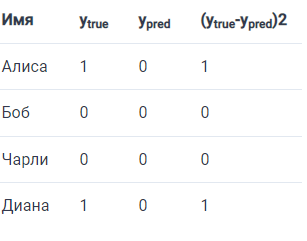

$$
MSE=\frac{1}{4}(1+0+0+1)=0.5
$$

###Пишем функцию средней квадратичной ошибки

Вот небольшой кусок кода, который рассчитает наши потери. Если вы не понимаете, почему он работает, прочитайте в [руководстве NumPy](https://numpy.org/doc/stable/user/quickstart.html#basic-operations) про операции с массивами.

In [4]:
import numpy as np

def mse_loss(y_true, y_pred):
  # y_true и y_pred - массивы numpy одинаковой длины.
  return ((y_true - y_pred) ** 2).mean()

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


**Отлично.** Идем дальше!

##4. Обучаем нейронную сеть (часть 2)

Теперь у нас есть четкая цель: минимизировать потери нейронной сети. Мы знаем, что можем изменять веса и пороги нейронов, чтобы изменить ее предсказания, но как нам делать это таким образом, чтобы минимизировать потери?

**Внимание: математика!**

>Этот раздел использует частные производные по нескольким переменным. Если вы плохо знакомы с дифференциальным исчислением, можете просто пропускать математические формулы.

Для простоты давайте представим, что в нашем наборе данных только одна Алиса.

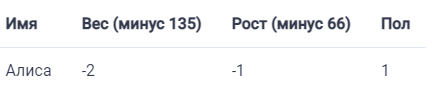

Тогда средняя квадратичная ошибка будет квадратичной ошибкой только для Алисы:
$$
MSE=\frac{1}{1} \sum\limits_{i=1}^{1} (y_{true}-y_{pred})^2=(y_{true}-y_{pred})^2=(1-y_{pred})^2
$$

Другой метод – это рассматривать функцию потерь как функцию от весов и порогов. Давайте отметим все веса и пороги нашей нейронной сети:

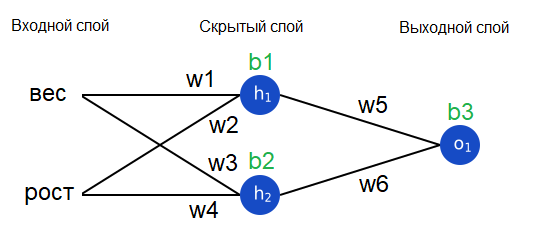

Теперь мы можем записать функцию потерь как функцию от нескольких переменных:

$$
L(\omega_1, \omega_2, \omega_3, \omega_4, \omega_5, \omega_6, b_1, b_2, b_3)
$$

Предположим, мы хотим отрегулировать $w_1$. Как изменится значение потери L при изменении $w_1$? На этот вопрос может ответить [частная производная](https://ru.wikipedia.org/wiki/Частная_производная) $\frac{dL}{dw_1}$. 

**Как мы ее рассчитаем?**

**Не падайте духом!**

>Здесь математика становится более сложной. Возьмите бумагу и ручку, чтобы не отставать – это поможет вам понять, что происходит.

Прежде всего, давайте перепишем эту частную производную через $\frac{dy_{pred}}{dw_1}$, воспользовавшись [цепным правилом:](https://ru.wikipedia.org/wiki/Дифференцирование_сложной_функции)


$$
\frac{\partial L}{\partial \omega_1}=\frac{\partial L}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial \omega_1}
$$

Мы можем рассчитать $\frac{\partial L}{\partial y_{pred}}$, поскольку мы уже выяснили выше, что $L=(1-y_{pred})^2$:

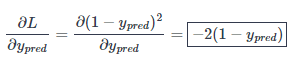

Теперь давайте решим, что делать с $\frac{\partial y_{pred}}{\omega_1}$. Обозначая выходы нейронов, как прежде, $h_1, h_2$ и $o_1$, получаем:

$$
y_{pred}=o_1=f(\omega_5 \cdot h_1+\omega_6 \cdot h_2+b_3)
$$

Вспомните, что $f()$ – это наша функция активации, сигмоида. Поскольку $\omega_1$ влияет только на $h_1$ (но не на $h_2$), мы можем снова использовать цепное правило и записать:

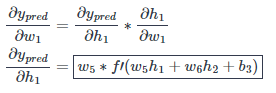

Мы можем сделать то же самое для $\frac{ \partial h_1}{ \partial \omega_1}$, снова применяя цепное правило:

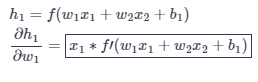

В этой формуле $x_1$ – это вес, а $x_2$ – рост. Вот уже второй раз мы встречаем $f'(x)$ – производную сигмоидной функции! Давайте вычислим ее:

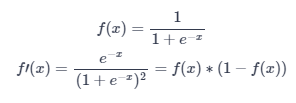

Мы используем эту красивую форму для f'(x) позже. На этом мы закончили! Мы сумели разложить $\frac{\partial L}{\partial w_1}$ на несколько частей, которые мы можем рассчитать:

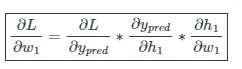

Такой метод расчета частных производных "от конца к началу" называется [методом обратного распространения (backpropagation)](https://ru.wikipedia.org/wiki/етод_обратного_распространения_ошибки).

**Уффф.** Здесь было очень много символов, так что не страшно, если вы пока не все понимаете. Давайте покажем, как это работает, на практическом примере!

###Пример. Считаем частную производную
Мы по-прежнему считаем, что наш набор данных состоит из одной Алисы:

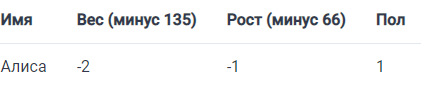

Давайте инициализируем все веса как 1, а все пороги как 0. Если мы выполним прямой проход по нейронной сети, то получим:

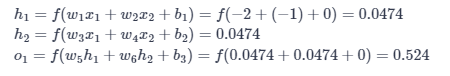

Наша сеть выдает $y_{pred}=0.524$, что находится примерно на полпути между Мужским полом (0) и Женским (1). Давайте рассчитаем $\frac{\partial L} {\partial \omega_1}$:

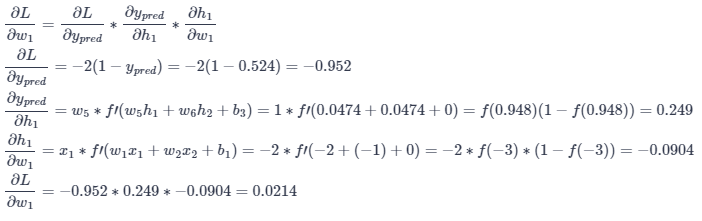

**Напоминаем:**
>Ранее мы получили формулу для производной сигмоиды $f'(x)=f(x)(1-f(x))$

**Вот и все!** Результат говорит нам, что при увеличении $\omega_1$, функция ошибки чуть-чуть повышается.

###Обучение: стохастический градиентный спуск

Теперь у нас есть все нужные инструменты для обучения нейронной сети! Мы используем алгоритм оптимизации под названием стохастический градиентный спуск (stochastic gradient descent), который определит, как мы будем изменять наши веса и пороги для минимизации потерь. Фактически, он заключается в следующей формуле обновления:
$$
\omega_1 \leftarrow \omega_1 - \eta \frac{\partial L}{\partial \omega_1}
$$
$\eta (eta)-$ константа, называемая скоростью обучения (learning rate). 

Скорость обучения определяет, как быстро наша сеть учится. Все, что мы делаем – это вычитаем $\eta \frac{\partial L}{\partial \omega_1}$ из $w_1$:

* Если $\frac{\partial L}{\partial \omega_1}$  положительна, $w_1$ уменьшится, что уменьшит $L$.
* Если $\frac{\partial L}{\partial \omega_1}$ отрицательна, $w_1$ увеличится, что также уменьшит $L$.

Если мы сделаем то же самое для каждого веса и порога в сети, потери будут постепенно уменьшаться, и наша сеть будет выдавать более точные результаты.

Процесс обучения сети будет выглядеть примерно так:

1. Выбираем одно наблюдение из набора данных. Именно то, что мы работаем только с одним наблюдением, делает наш градиентный спуск стохастическим.
2. Считаем все частные производные функции потерь по всем весам и порогам (dL/dw1, dL/dw2 и т.д.)
3. Используем формулу обновления, чтобы обновить значения каждого веса и порога.
4. Снова переходим к шагу 1.

###Пишем код всей нейронной сети
Наконец настало время реализовать всю нейронную сеть.

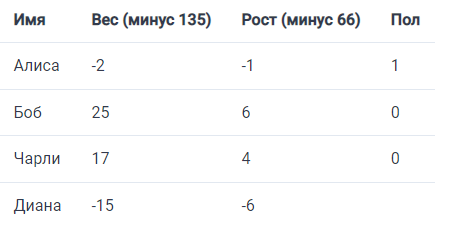

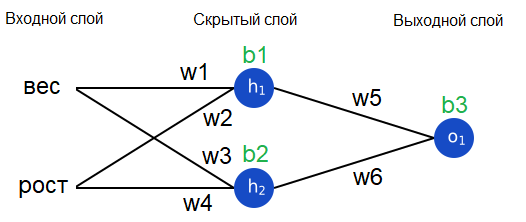

In [5]:
import numpy as np

def sigmoid(x):
  # Сигмоидная функция активации: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Производная сигмоиды: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true и y_pred - массивы numpy одинаковой длины.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  Нейронная сеть с:
    - 2 входами
    - скрытым слоем с 2 нейронами (h1, h2)
    - выходной слой с 1 нейроном (o1)

  *** DISCLAIMER ***:
  Следующий код простой и обучающий, но НЕ оптимальный.
  Код реальных нейронных сетей совсем на него не похож. НЕ копируйте его! 
  Изучайте и запускайте его, чтобы понять, как работает эта нейронная сеть.
  '''
  def __init__(self):
    # Веса
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Пороги
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data - массив numpy (n x 2) numpy, n = к-во наблюдений в наборе. 
    - all_y_trues - массив numpy с n элементами.
      Элементы all_y_trues соответствуют наблюдениям в data.
    '''
    learn_rate = 0.1
    epochs = 1000 # сколько раз пройти по всему набору данных 

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Прямой проход (эти значения нам понадобятся позже)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Считаем частные производные.
        # --- Имена: d_L_d_w1 = "частная производная L по w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Нейрон o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Нейрон h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Нейрон h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Обновляем веса и пороги
        # Нейрон h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Нейрон h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Нейрон o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Считаем полные потери в конце каждой эпохи
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Определим набор данных
data = np.array([
  [-2, -1],  # Алиса
  [25, 6],   # Боб
  [17, 4],   # Чарли
  [-15, -6], # Диана
])
all_y_trues = np.array([
  1, # Алиса
  0, # Боб
  0, # Чарли
  1, # Диана
])

# Обучаем нашу нейронную сеть!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.433
Epoch 10 loss: 0.221
Epoch 20 loss: 0.155
Epoch 30 loss: 0.113
Epoch 40 loss: 0.088
Epoch 50 loss: 0.071
Epoch 60 loss: 0.059
Epoch 70 loss: 0.050
Epoch 80 loss: 0.043
Epoch 90 loss: 0.038
Epoch 100 loss: 0.034
Epoch 110 loss: 0.030
Epoch 120 loss: 0.027
Epoch 130 loss: 0.025
Epoch 140 loss: 0.023
Epoch 150 loss: 0.021
Epoch 160 loss: 0.019
Epoch 170 loss: 0.018
Epoch 180 loss: 0.017
Epoch 190 loss: 0.016
Epoch 200 loss: 0.015
Epoch 210 loss: 0.014
Epoch 220 loss: 0.013
Epoch 230 loss: 0.013
Epoch 240 loss: 0.012
Epoch 250 loss: 0.011
Epoch 260 loss: 0.011
Epoch 270 loss: 0.010
Epoch 280 loss: 0.010
Epoch 290 loss: 0.010
Epoch 300 loss: 0.009
Epoch 310 loss: 0.009
Epoch 320 loss: 0.008
Epoch 330 loss: 0.008
Epoch 340 loss: 0.008
Epoch 350 loss: 0.008
Epoch 360 loss: 0.007
Epoch 370 loss: 0.007
Epoch 380 loss: 0.007
Epoch 390 loss: 0.007
Epoch 400 loss: 0.007
Epoch 410 loss: 0.006
Epoch 420 loss: 0.006
Epoch 430 loss: 0.006
Epoch 440 loss: 0.006
Epoch 450 loss: 0.006

По мере обучения сети ее потери постепенно уменьшаются:

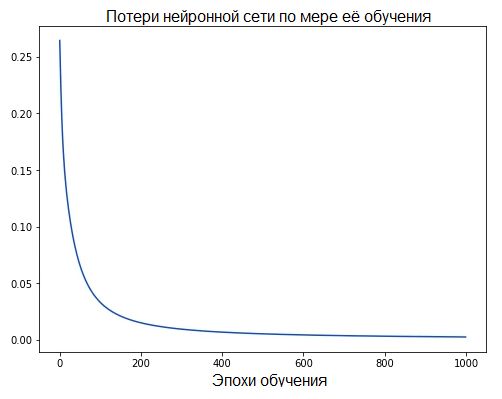

Теперь мы можем использовать нашу сеть для предсказания пола:

In [6]:
# Делаем пару предсказаний
emily = np.array([-7, -3]) # 128 фунтов (52.35 кг), 63 дюйма (160 см)
frank = np.array([20, 2])  # 155 pounds (63.4 кг), 68 inches (173 см)
print("Эмили: %.3f" % network.feedforward(emily)) # 0.951 - Ж
print("Фрэнк: %.3f" % network.feedforward(frank)) # 0.039 - М

Эмили: 0.964
Фрэнк: 0.056


**Что теперь?**
Вы сделали это! Давайте перечислим все, что мы с вами сделали:

* Определили нейроны, составные элементы нейронных сетей.
* Использовали сигмоидную функцию активации для наших нейронов.
* Увидели, что нейронные сети – это всего лишь несколько нейронов, соединенных друг с другом.
* Создали набор данных, в котором Вес и Рост были входными данными (или признаками), а Пол – выходным (или меткой).
* Узнали о функции потерь и средней квадратичной ошибке (MSE).
* Поняли, что обучение нейронной сети – это всего лишь минимизация ее потерь.
* Использовали метод обратного распространения (backpropagation) для расчета частных производных.
* Использовали стохастический градиентный спуск (SGD) для обучения нашей сети.